This notebooks intents to explore the yield produced by real estate properties in NW6 by using just REAL DATA instead of predictions by RSI models.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import utilities

In [2]:
data_sale = pd.read_csv('nw6_data_sale.csv', index_col=0)
data_rent_agg = pd.read_csv('./rent_data_agg.csv', index_col=0, names=['year', 'beds', 'count', 'rent'], skiprows=1)\
            .drop('count', axis=1)
data_rent = pd.read_csv('./nw6_data_rent.csv', index_col=0).rename(columns={'price':'rent'})

In [3]:
data_sale['postcode_zone'] = data_sale['postcode'].str[4:5]

In [4]:
data_rent.head()

,rent,beds,baths,reception,href,type,date,direction,year
0,1993,2,1.0,NaN,/to-rent/details/53728682,2 bed flat to rent,16th Dec 2019,"Malvern Mews, London NW6",2019
1,2000,2,NaN,1.0,/to-rent/details/53727538,2 bed flat to rent,16th Dec 2019,"Kings Gardens, London NW6",2019
2,1993,2,2.0,1.0,/to-rent/details/53722191,2 bed flat to rent,14th Dec 2019,"Fairfax Place, Swiss Cottage NW6",2019
3,2100,2,1.0,1.0,/to-rent/details/53716641,2 bed flat to rent,13th Dec 2019,"West End Lane, London NW6",2019
6,1993,2,2.0,1.0,/to-rent/details/53714561,2 bed flat to rent,13th Dec 2019,"Fairfax Place, Swiss Cottage NW6",2019


In [5]:
# As the rents are classified as 4 or above beds, we need to do the same with the 
# same with the sales.
data_sale.loc[data_sale['beds']>=4, 'beds'] = 4

## We don't have enought 0-beds data. Only 35. We drop them off for now.
data_sale = data_sale[data_sale['beds']!=0]

In [6]:
data_sale.head()

,address,attributes,postcode,beds,price,date,year,postcode_zone
0,"Flat 4, Elstow Grange 40-42, Brondesbury Park","Flat, Freehold, 3 Beds, 1 Bath, 1 Recep",NW6-7DW,3,140000,1998-11-01,1998,7
1,"1, Broadhurst Mansions, 97 Broadhurst Gardens","Flat, Share of freehold, 3 Beds, 2 Baths, 1 Recep",NW6-3QP,3,197500,1998-06-01,1998,3
2,"Ground And First Floor Flat, 24 Greencroft Gar...","Maisonette, Share of freehold, 3 Beds, 2 Baths...",NW6-3LS,3,265000,1998-02-01,1998,3
3,36 West End Lane,"Flat, Leasehold, 3 Beds, 1 Bath, 1 Recep",NW6-4PA,3,139999,1998-08-01,1998,4
4,44 Donaldson Road,"Flat, Share of freehold, 3 Beds, 3 Baths, 2 Re...",NW6-6NG,3,110000,1998-04-01,1998,6


In [7]:
data_rent.head()

,rent,beds,baths,reception,href,type,date,direction,year
0,1993,2,1.0,NaN,/to-rent/details/53728682,2 bed flat to rent,16th Dec 2019,"Malvern Mews, London NW6",2019
1,2000,2,NaN,1.0,/to-rent/details/53727538,2 bed flat to rent,16th Dec 2019,"Kings Gardens, London NW6",2019
2,1993,2,2.0,1.0,/to-rent/details/53722191,2 bed flat to rent,14th Dec 2019,"Fairfax Place, Swiss Cottage NW6",2019
3,2100,2,1.0,1.0,/to-rent/details/53716641,2 bed flat to rent,13th Dec 2019,"West End Lane, London NW6",2019
6,1993,2,2.0,1.0,/to-rent/details/53714561,2 bed flat to rent,13th Dec 2019,"Fairfax Place, Swiss Cottage NW6",2019


Sales cleaning

In [8]:
# We filter the sales data so we keep only the data from the same years.
data_sale = data_sale[data_sale['year'].isin(data_rent['year'].unique())]
data_sale.head()

,address,attributes,postcode,beds,price,date,year,postcode_zone
5835,"Flat 4, 50 Compayne Gardens","Flat, Share of freehold, 1 Bed, 1 Bath, 1 Recep",NW6-3RY,1,612000,2019-01-01,2019,3
5837,38 Dyne Road,"Flat, Leasehold, 1 Bed, 1 Bath, 1 Recep",NW6-7XE,1,600000,2019-03-01,2019,7
5838,49 Princess Road,"Flat, Share of freehold, 1 Bed, 1 Bath, 1 Recep",NW6-5QT,1,520000,2019-01-01,2019,5
5839,21 Lowfield Road,"Flat, Leasehold, 1 Bed, 1 Bath, 1 Recep",NW6-2PP,1,370000,2019-05-01,2019,2
5840,"Basement Flat, 2 Sandwell Crescent","Flat, Share of freehold, 1 Bed, 1 Bath, 1 Recep",NW6-1PB,1,395000,2019-10-01,2019,1


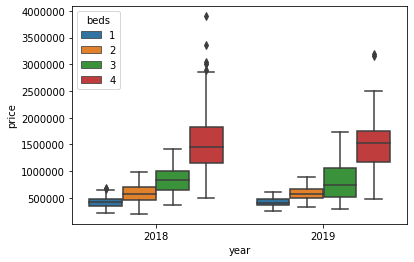

In [9]:
sns.boxplot(data=data_sale, x='year', y='price', hue='beds')
plt.show()

Removed 9 points (1.7%)


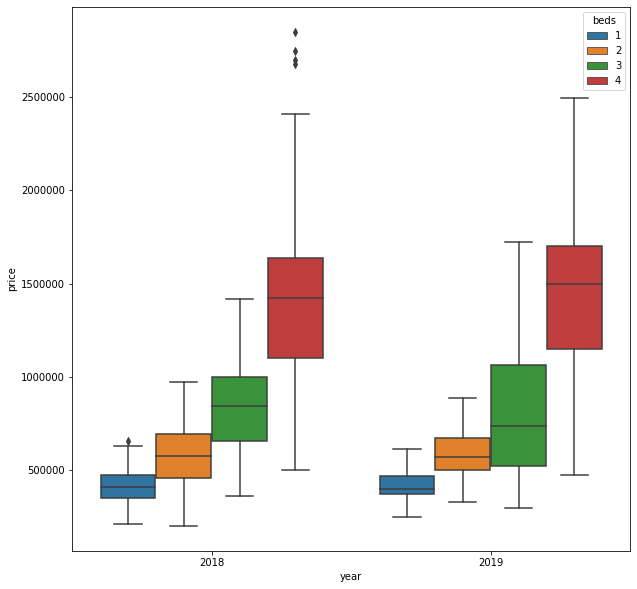

In [10]:
# We remove outliers
data_sale_no = utilities.remove_multidim_outliers(data_sale, ['year', 'beds'], 'price', 1.5)

plt.figure(figsize=(10,10))
sns.boxplot(data=data_sale_no, x='year', y='price', hue='beds')
plt.show()

Yield calculation

In [11]:
full_df = data_sale.merge(data_rent, on=['beds', 'year'])
full_df = full_df[full_df['year']==2019] ## We have almost no data from 2018. Only from 2019. So we can delete them.
full_df['yield'] = full_df['rent']*12/full_df['price']*100

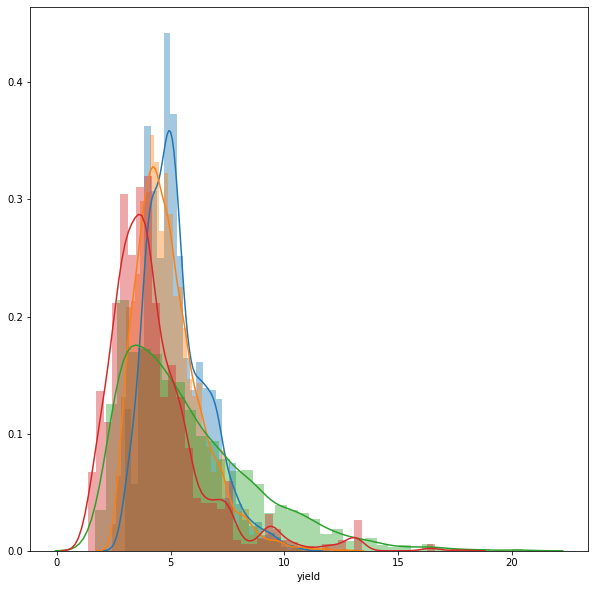

In [12]:

plt.figure(figsize=(10,10))
sns.distplot(full_df[full_df['beds']==1]['yield'])
sns.distplot(full_df[full_df['beds']==2]['yield'])
sns.distplot(full_df[full_df['beds']==3]['yield'])
sns.distplot(full_df[full_df['beds']==4]['yield'])
plt.show()

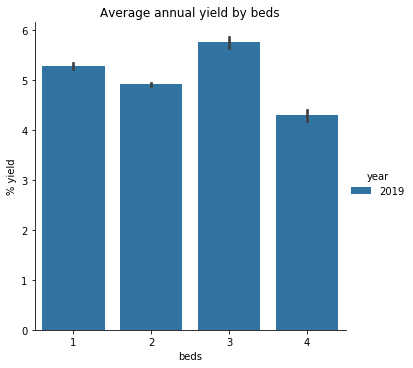

In [13]:
sns.catplot(data=full_df, y='yield', x='beds', hue='year' ,kind="bar")
plt.title('Average annual yield by beds')
plt.ylabel('% yield')
plt.show()

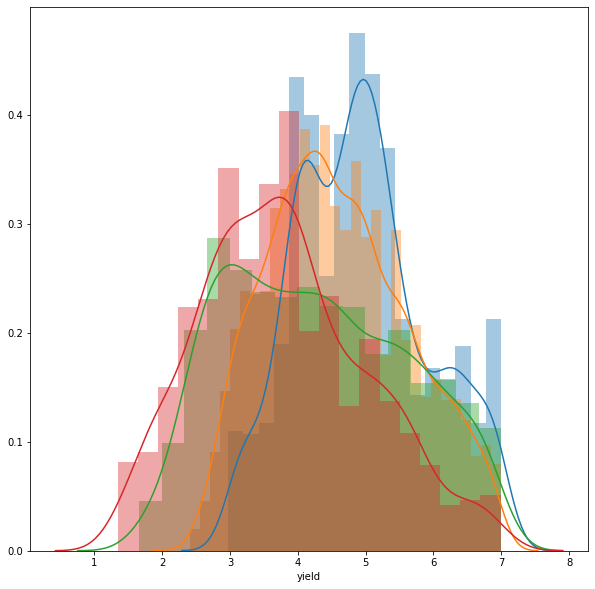

In [14]:
full_data_s = full_df[(full_df['yield']>1)&(full_df['yield']<7)]

plt.figure(figsize=(10,10))
sns.distplot(full_data_s[full_data_s['beds']==1]['yield'])
sns.distplot(full_data_s[full_data_s['beds']==2]['yield'])
sns.distplot(full_data_s[full_data_s['beds']==3]['yield'])
sns.distplot(full_data_s[full_data_s['beds']==4]['yield'])
plt.show()

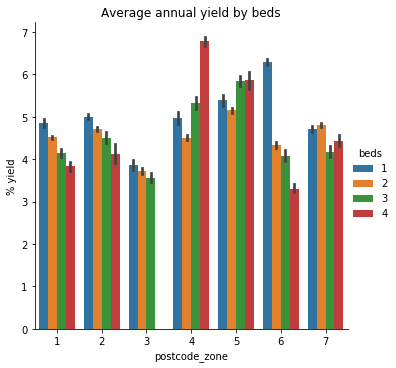

In [15]:
sns.catplot(data=full_data_s, y='yield', x='postcode_zone', hue='beds' ,kind="bar")
plt.title('Average annual yield by beds')
plt.ylabel('% yield')
plt.show()

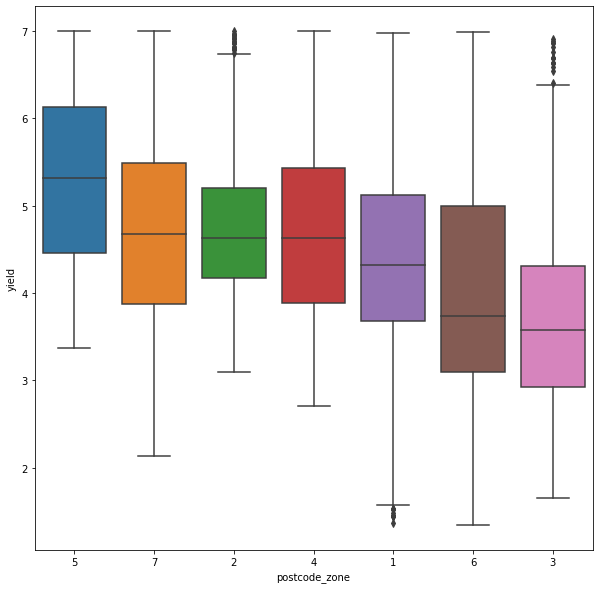

In [16]:
plt.figure(figsize=(10,10))
sns.boxplot(data=full_data_s, x='postcode_zone', y='yield', order=\
           full_data_s.groupby(by=['postcode_zone'])['yield'].median().sort_values(ascending=False).index)
plt.show()

In [17]:
import plotly.graph_objects as go

In [18]:
post_codes = pd.read_csv('./extra_data/NW6 postcodes.csv', usecols=['Postcode', 'Latitude', 'Longitude']).rename(columns={'Postcode':'postcode'})
post_codes['postcode'] = post_codes['postcode'].str.replace(' ', '-')

In [19]:
post_codes.head()

,postcode,Latitude,Longitude
0,NW6-1AA,51.552426,-0.193281
1,NW6-1AB,51.552206,-0.194170
2,NW6-1AD,51.552161,-0.194777
3,NW6-1AE,51.552261,-0.195423
4,NW6-1AF,51.551246,-0.193732


In [20]:
full_data_s.head()

,address,attributes,postcode,beds,price,date_x,year,postcode_zone,rent,baths,reception,href,type,date_y,direction,yield
0,"Flat 4, 50 Compayne Gardens","Flat, Share of freehold, 1 Bed, 1 Bath, 1 Recep",NW6-3RY,1,612000,2019-01-01,2019,3,1650,1.0,1.0,/to-rent/details/53718811,1 bed flat to rent,13th Dec 2019,"Dennington Park Road, West Hampstead, London NW6",3.235294
1,"Flat 4, 50 Compayne Gardens","Flat, Share of freehold, 1 Bed, 1 Bath, 1 Recep",NW6-3RY,1,612000,2019-01-01,2019,3,1625,1.0,1.0,/to-rent/details/53715085,1 bed flat to rent,13th Dec 2019,"Victoria Road, Kilburn NW6",3.186275
2,"Flat 4, 50 Compayne Gardens","Flat, Share of freehold, 1 Bed, 1 Bath, 1 Recep",NW6-3RY,1,612000,2019-01-01,2019,3,1517,NaN,NaN,/to-rent/details/53687359,1 bed flat to rent,10th Dec 2019,"Mazenod Avenue, London NW6",2.974510
3,"Flat 4, 50 Compayne Gardens","Flat, Share of freehold, 1 Bed, 1 Bath, 1 Recep",NW6-3RY,1,612000,2019-01-01,2019,3,1525,1.0,1.0,/to-rent/details/50075093,1 bed maisonette to rent,10th Dec 2019,"Hillfield Road, West Hampstead NW6",2.990196
4,"Flat 4, 50 Compayne Gardens","Flat, Share of freehold, 1 Bed, 1 Bath, 1 Recep",NW6-3RY,1,612000,2019-01-01,2019,3,1842,1.0,1.0,/to-rent/details/53680677,1 bed flat to rent,10th Dec 2019,"Blackburn Road, West Hampstead, London NW6",3.611765


In [21]:
full_data_s = full_data_s.merge(post_codes, on='postcode')

# MAPS

In [106]:
api_key='pk.eyJ1IjoiYW5nZWxydXJlIiwiYSI6ImNrNDhtcThsejA5YWUzbG1wdDVzNm05NmUifQ.fo-_pWKAI6FiBnqRi73Fhg'

data_map = full_data_s.merge(full_data_s.groupby('postcode')['yield'].mean().reset_index(), on='postcode')
data_map['size'] = 7

import plotly.express as px
px.set_mapbox_access_token(api_key)
carshare = px.data.carshare()
fig = px.scatter_mapbox(data_map, lat="Latitude", lon="Longitude", color="yield_y", text='postcode', size='size')


fig.update_layout(
    autosize=True,
    width = 1000,
    height = 1000,
    hovermode='closest',
    mapbox=go.layout.Mapbox(
        accesstoken=api_key,
        bearing=0,
        center=go.layout.mapbox.Center(
            lat= 51.545,
            lon=-0.2018
        ),
        pitch=0,
        zoom=13
    )
)

